a. Computation of mean image and 2 principal components associated with highest eigan values of MNIST dataset with values 1

In [1]:
#import libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#get dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#filter out 1s and 9s to separate datasets
train_filter1 = np.where(y_train == 1 ) 
x_train1, y_train1 = x_train[train_filter1], y_train[train_filter1]
test_filter1 = np.where(y_test==1)
x_test1, y_test1 = x_test[test_filter1], y_test[test_filter1]

train_filter9 = np.where(y_train == 9 ) 
x_train9, y_train9 = x_train[train_filter9], y_train[train_filter9]
test_filter9 = np.where(y_test==9)
x_test9, y_test9 = x_test[test_filter9], y_test[test_filter9]

In [4]:
#get shape of x_train
x_train.shape

(60000, 28, 28)

In [6]:
#get shape of training set 1s
x_train1.shape

(6742, 28, 28)

In [7]:
#get shape of training set 9s
x_train9.shape

(5949, 28, 28)

In [8]:
#get shape of test set 1s
x_test1.shape

(1135, 28, 28)

In [9]:
#get shape of test set 9s
x_test9.shape

(1009, 28, 28)

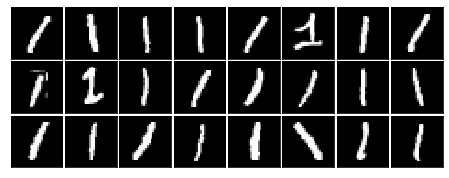

In [10]:
#display first 24 images of 1
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(24):
    ax = fig.add_subplot(8, 8, i+1, xticks =[], yticks =[])
    ax.imshow(x_train1[i], interpolation = 'nearest', cmap = "gray")
plt.show()

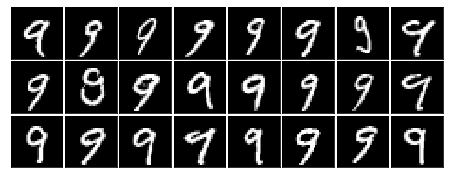

In [11]:
#display first 24 images of 9
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(24):
    ax = fig.add_subplot(8, 8, i+1, xticks =[], yticks =[])
    ax.imshow(x_train9[i], interpolation = 'nearest', cmap = "gray")
plt.show()

Compute mean of 1s and 9s

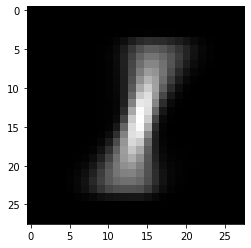

In [12]:
#compute mean of 1s
mean1 = x_train1.mean(axis=0)
plt.imshow(mean1, cmap='gray')

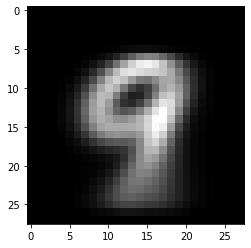

In [13]:
#compute mean of 9s
mean9 = x_train9.mean(axis=0)
plt.imshow(mean9, cmap='gray')

In [15]:
#reshaping dimensions of train and test sets
train1 = x_train1.reshape(6742, 784)
test1 = x_test1.reshape(1135,784)

train9 = x_train9.reshape(5949, 784)
test9 = x_test9.reshape(1009,784)

Going ahead with 1s dataset for computing 2 principal components associated with highest eiganvalues

In [16]:
#standardizing the data for 1 to compute pca on
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train1)
print(standardized_data.shape)
sample_data = standardized_data

(6742, 784)


In [17]:
#computing first two principal components
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
principalcomponents = pca.fit_transform(sample_data)
principalcomponents_df = pd.DataFrame(data=principalcomponents, columns=("1st_principal", "2nd_principal"))
principalcomponents_df

,1st_principal,2nd_principal
0,10.635835,-0.582520
1,-10.721328,6.338166
2,-7.311305,1.343373
3,-6.699456,0.178257
4,10.739667,0.195316
5,-3.125742,18.571468
6,-4.815062,-3.332344
7,9.680546,-1.803225
8,1.759626,-1.383368
9,-12.530487,16.387444


C:\Users\sarva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


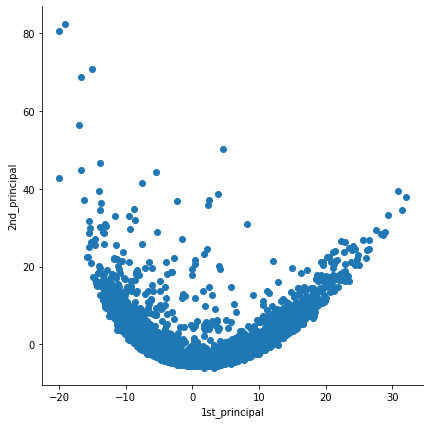

In [18]:
#visualizing the principal components
sns.FacetGrid(principalcomponents_df, size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

b. Reconstruction of test image using mean image and with p = 10 and p = 50 (1s dataset)

1


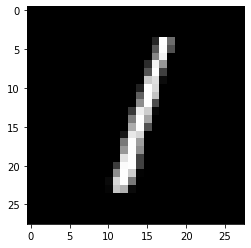

In [19]:
#displaying 1st image of 1
image_index = 0
print(y_test1[image_index]) 
plt.imshow(x_test1[image_index], cmap="gray")
plt.show()

In [20]:
#reconstruction of above images from n_components = 10

from sklearn.decomposition import PCA
pca_10 = PCA(10)
pca_10.fit_transform(train1)
components = pca_10.transform(test1)
projected = pca_10.inverse_transform(components)
projected.shape

(1135, 784)

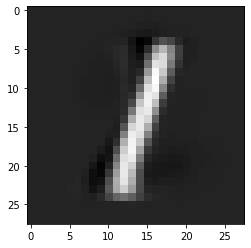

In [21]:
reconstructed_10 = projected.reshape(1135,28,28)
plt.imshow(reconstructed_10[1], cmap = "gray")
plt.show()

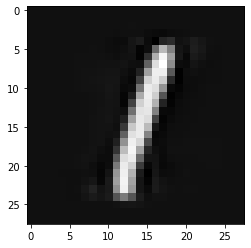

In [22]:
#reconstruction from n_components = 50

pca_50 = PCA(50)
pca_50.fit_transform(train1)
components1 = pca_50.transform(test1)
projected1 = pca_50.inverse_transform(components1)
reconstructed_50 = projected1.reshape(1135,28,28)
plt.imshow(reconstructed_50[1], cmap = "gray")
plt.show()

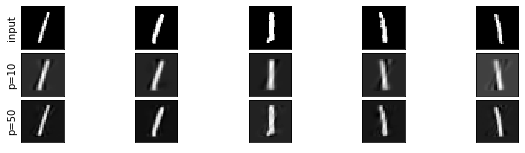

In [23]:
#printing five first images for a clearer picture
fig, axarr = plt.subplots(3,5,figsize=(10,2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    axarr[0,i].imshow(x_test1[i], cmap = "gray")
    axarr[1,i].imshow(reconstructed_10[i], cmap = "gray")
    axarr[2,i].imshow(reconstructed_50[i], cmap = "gray")
axarr[0, 0].set_ylabel('input')
axarr[1, 0].set_ylabel('p=10')
axarr[2, 0].set_ylabel('p=50');

c. Computing and displaying SSD and DFFS (for both 1s and 9s datasets)

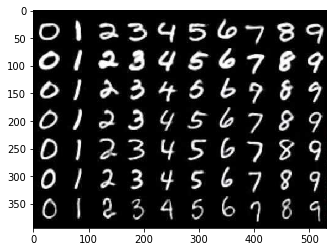

In [24]:
#import composite image
import cv2 as cv
composite = cv.imread ("composite_image.png")
plt.imshow(composite)
plt.show()

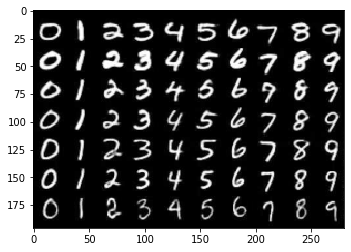

In [25]:
#resizing composite image to fit windows (next step) of 28x28 size properly
img = cv.resize(composite, (280, 196))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.show()

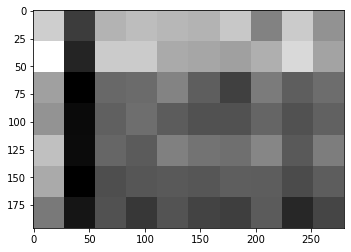

In [26]:
#compute SSD of 1s
t1 = np.zeros((196,280))
stepSize = 28

(w1, h1) = (28, 28) # window size
for x in range(0, gray.shape[0], stepSize): #creating a for loop for windows to slide through the entire range of composite image
   for y in range(0, gray.shape[1], stepSize):
      window1 = gray[x:x + w1, y:y + h1] #creating the window
      t1[x:x + w1, y:y + h1]= ((window1 - mean1)**2).sum(axis=-1).sum(axis=-1) #computing SSD by subtracting mean from window image
      
plt.imshow(t1, cmap = "gray")
plt.show()

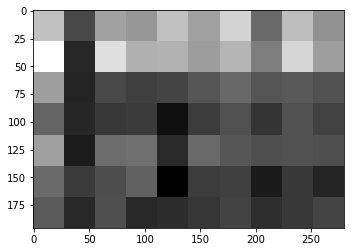

In [27]:
#compute SSD of 9s
t9 = np.zeros((196,280))
stepSize = 28

(w9, h9) = (28, 28) # window size
for x in range(0, gray.shape[0], stepSize): #creating a for loop for windows to slide through the entire range of composite image
   for y in range(0, gray.shape[1], stepSize):
      window9 = gray[x:x + w9, y:y + h9] #creating the window
      t9[x:x + w9, y:y + h9]= ((window9 - mean9)**2).sum(axis=-1).sum(axis=-1) #computing SSD by subtracting mean from window image
      
plt.imshow(t9, cmap = "gray")
plt.show()

In [28]:
#compute DFFS of 1s

#computing pca with 100 components
pca_100 = PCA(100)
pca_100.fit(train1)
p_comp=pca_100.components_ 
a=pca_100.fit_transform(train1)
p_comp.shape

(100, 784)

In [29]:
#computing summation of the square of components
s = 0
for i in range(0,p_comp.shape[0]):
  #s = np.sum(np.square(p_comp[i]))
  s = s + (p_comp[i]*p_comp[i])

In [30]:
s.shape

(784,)

In [31]:
sum1 = s.reshape(28,28) #reshaping so that it can be subtracted from (window - mean) which is 28x28
sum1.shape

(28, 28)

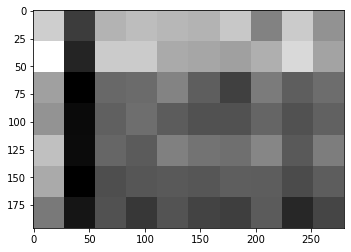

In [35]:
t1 = np.zeros((196,280))
stepSize = 28

(w1, h1) = (28, 28) # window size
for x in range(0, gray.shape[0], stepSize): #creating a for loop for windows to slide through the entire range of composite image
   for y in range(0, gray.shape[1], stepSize):
      window1 = gray[x:x + w1, y:y + h1] 
      t1[x:x + w1, y:y + h1]= (((window1 - mean1)**2)-sum1).sum(axis=-1).sum(axis=-1) #subtracting summation of square of components from (window - mean) as computed for SSD
      
plt.imshow(t1, cmap = "gray")
plt.show()

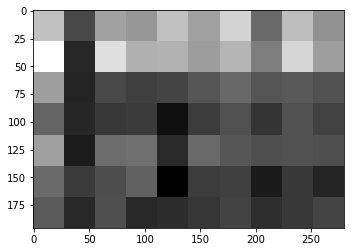

In [36]:
#compute DFFS of 9s
t9 = np.zeros((196,280))
stepSize = 28

(w9, h9) = (28, 28) # window size
for x in range(0, gray.shape[0], stepSize): #creating a for loop for windows to slide through the entire range of composite image
   for y in range(0, gray.shape[1], stepSize):
      window9 = gray[x:x + w9, y:y + h9] 
      t9[x:x + w9, y:y + h9]= (((window9 - mean9)**2)-sum1).sum(axis=-1).sum(axis=-1)
      
plt.imshow(t9, cmap = "gray")
plt.show()


d. Evaluation of the performance of SSD and DFFS 

SSD and DFFS of dataset of 1s and 9s have been computed and as seen from the images, the heatmaps significantly change. For 1s,the heatmaps show the second column dark very clearly as that is where the 1s lie as can be infered from the composite image. 
Similarly for 9s, we see the 1s column highlighted possibly because most 9s in the MNIST dataset resemble 1. Also, some 4s are highlighted because of its shape being quite similar to 1s and 9s. 

What can be infered from these observations is that a clear heatmap signifying the resemblance of images can be constructed by calculating SSD and DFFS. However, they possess challenges if there are similar images which may cause obstruction in clearly distinguishing the images if they share similar characteristics (such as 1,4,7 and 9).

References:

    [1]. https://mml-book.github.io/book/mml-book.pdf
    [2]. https://ieeexplore.ieee.org/document/598227
    [3]. http://doras.dcu.ie/285/1/lncs_3212.pdf
    [4]. https://medium.com/@muskulpesent/sliding-windows-for-object-detection-with-python-709250eb6161
    [5]. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    [6]. https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html
    [7]. https://mylearningsinaiml.wordpress.com/2018/09/10/pca-visualization-mnist-data/
    [8]. https://nextjournal.com/gkoehler/digit-recognition-with-keras
    [9]. https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn
    [10]. https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html